In this kernel we will try to do a feature engineering on this data set.This data set is a work in process.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


### Importing Python Modules 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## A]Data Analysis
### We will analyse the dataset to identify

1.Missing values

2.Numerical variables 

3.Distribution of numerical variables 

4.Outliers 

5.Categorical Variables

6.Cardinality of categorical variables 

7.Potential relationship between variables and target (SalePrice)

### 1.Missing values

In [4]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in data.columns if data[var].isnull().sum()>1]

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(data[var].isnull().mean(),3),'% missing values')

LotFrontage 0.177 % missing values
Alley 0.938 % missing values
MasVnrType 0.005 % missing values
MasVnrArea 0.005 % missing values
BsmtQual 0.025 % missing values
BsmtCond 0.025 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.025 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.473 % missing values
GarageType 0.055 % missing values
GarageYrBlt 0.055 % missing values
GarageFinish 0.055 % missing values
GarageQual 0.055 % missing values
GarageCond 0.055 % missing values
PoolQC 0.995 % missing values
Fence 0.808 % missing values
MiscFeature 0.963 % missing values


Many of our columns have missing values.We will be dealing with the missing values in the coming steps.

### 2.Relationship between values being missing and Sale Price 

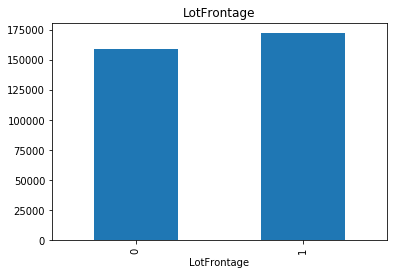

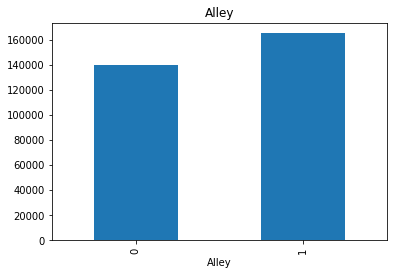

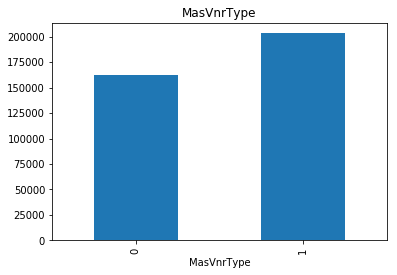

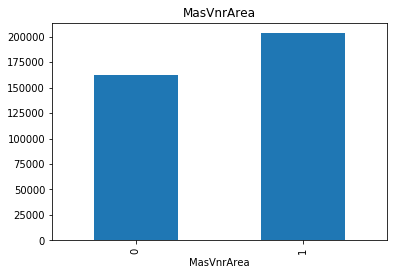

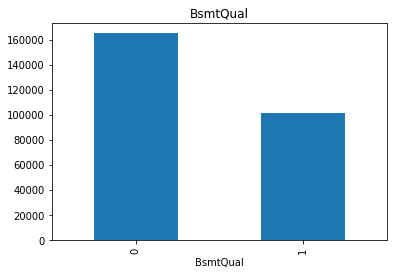

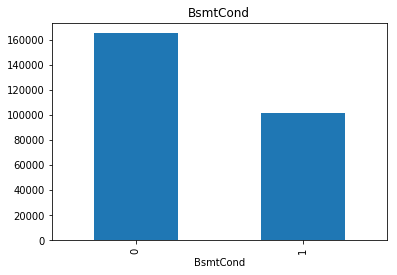

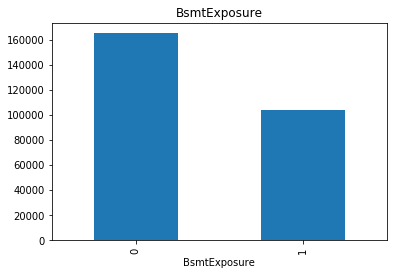

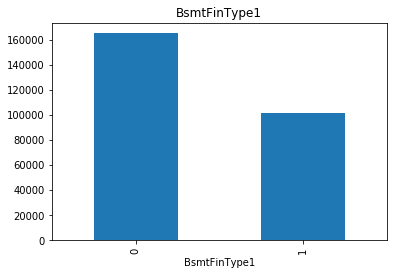

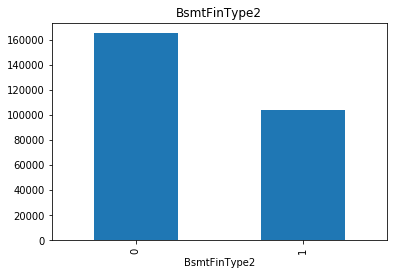

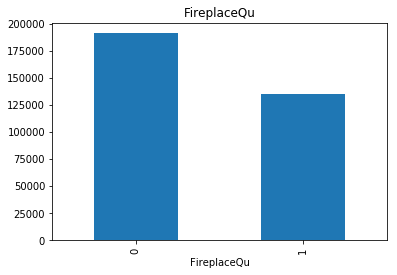

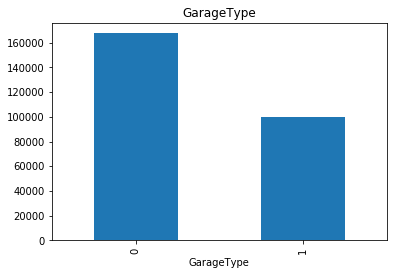

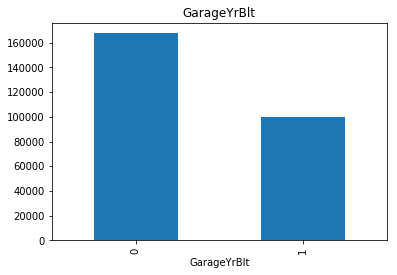

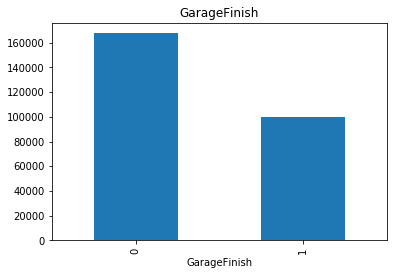

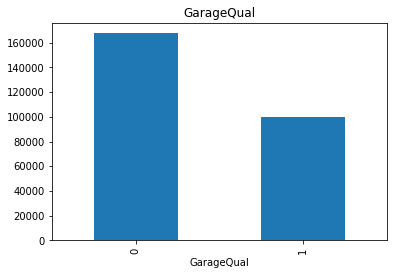

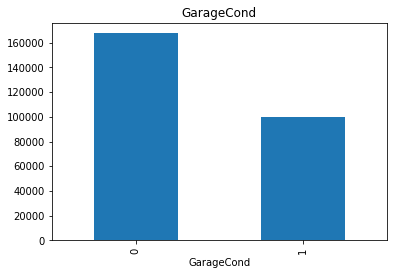

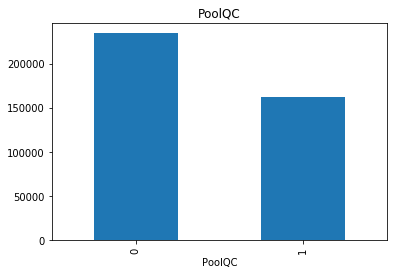

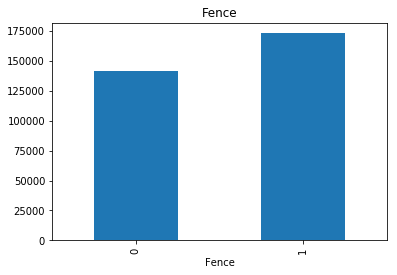

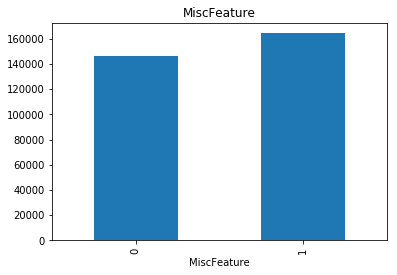

In [5]:
def analyse_na_value(df,var):
    df=df.copy()
    
    #Let's make a variable that indicates 1 if the observation was missing or Zero otherwise 
    df[var]=np.where(df[var].isnull(),1,0)
    
    #Let's calculate the mean SalePrice where the information is missing or present 
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(data,var)

0 -Means value is available and 1- Means Value is missing.

### 3.Numerical Variables

Lets go ahead and find out what numerical values we have in the dataset

In [6]:
# List of numerical variables
num_vars= [var for var in data.columns if data[var].dtypes!='O' ]

print('Number of numerical variables: ',len(num_vars))

# Visualise the numerical variables 
data[num_vars].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [7]:
print('Number of House Id labels:',len(data.Id.unique()))
print('Number of Houses in the Dataset',len(data))

Number of House Id labels: 1460
Number of Houses in the Dataset 1460


So there are 38 columns with numerical Values.We wont be needing the colum Id for makinf predictions for SalePrice of house.

### 4.Temporal variables

We can notice that there are four columns with the year data.We generally dont use this information directly to predict the SalePrice.We will do some feature engineering like difference between the year of built and the year when the house was sold.

In [8]:
# List of Variables that contain year information 
year_vars=[var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
# Lets explore the content of the years variables
for var in year_vars:
    print(var,data[var].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

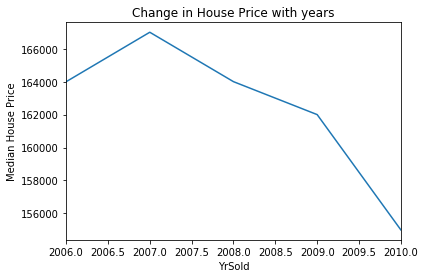

In [10]:
# Evloution of House Price with Year
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House Price with years');


We can see an unsual thing that the House Price is decreasing in year 2008-09.This was due to financial crisis that happened.

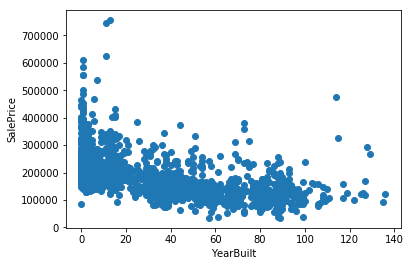

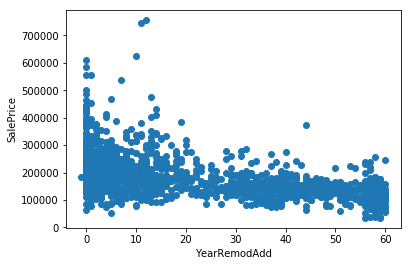

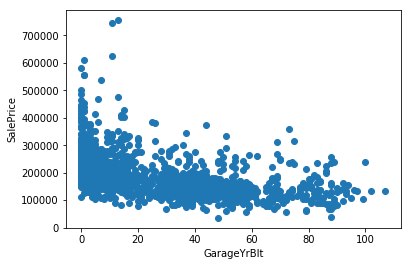

In [11]:
# Lets's explore the relationship between the year variable and the house price in little more details
def analyse_year_vars(df,var):
    df=df.copy()
    
    # capture differnce between year variable and year the house was sold 
    df[var]=df['YrSold']-df[var]
    
    plt.scatter(df[var],df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

for var in year_vars:
    if var !='YrSold':
       analyse_year_vars(data,var)

From all the above plots between the year and SalePrice data we can see that the price of the house decreases as it becomes older.So one of this variable is could be very useful in predicting the housing price.

### 5.Discrete Variables

Let's go ahead and find which variables are discrete ie show a finite number of values

In [12]:
# List of Discrete Variables 
discrete_vars=[var for var in num_vars if len(data[var].unique())<20 and var not in year_vars+['Id']]

print('Number of discrete variables:',len(discrete_vars))

Number of discrete variables: 14


In [13]:
# Let's visualize the discrete variables

data[discrete_vars].head()


,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


We can see that this variable tend to be Qualifications or grading scales or refer to number of rooms or units.Now lets go ahead and analyse their contribution to the SalePrice.

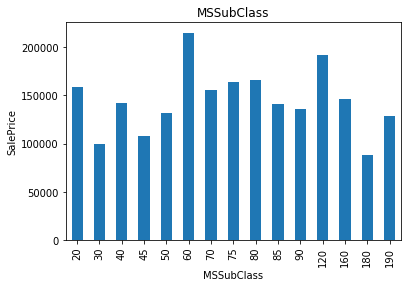

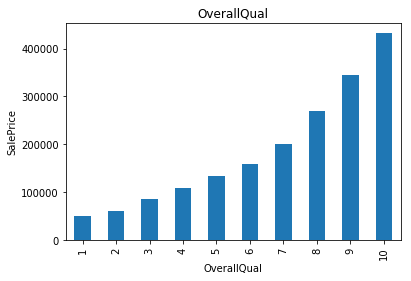

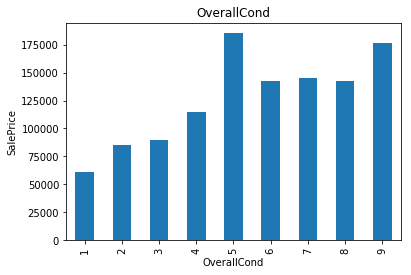

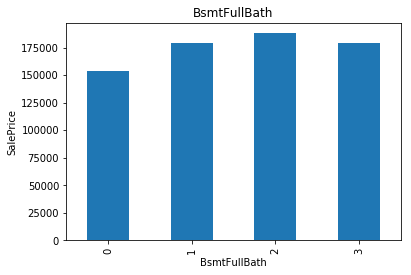

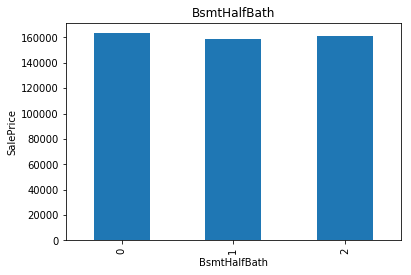

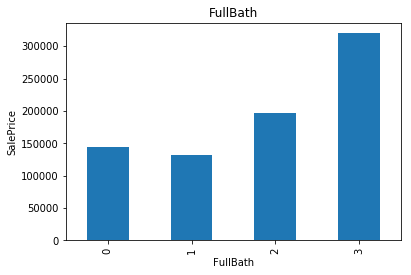

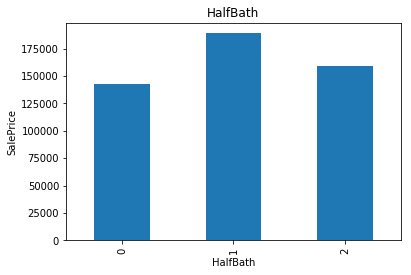

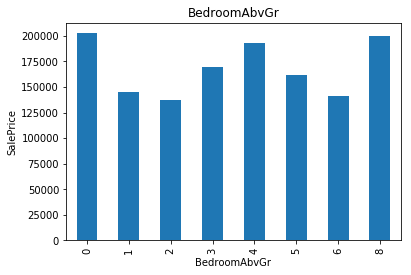

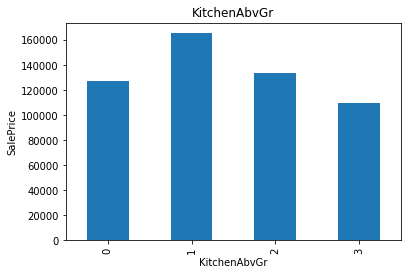

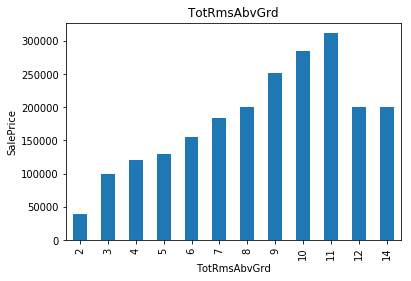

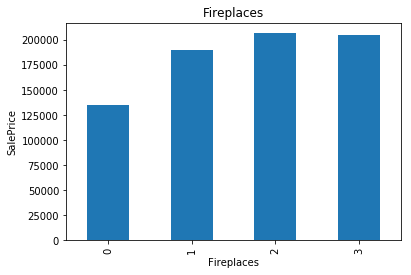

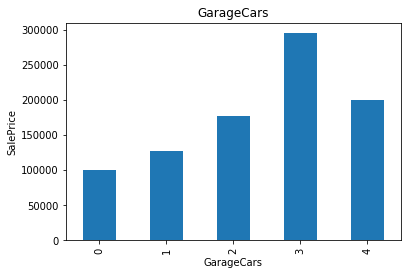

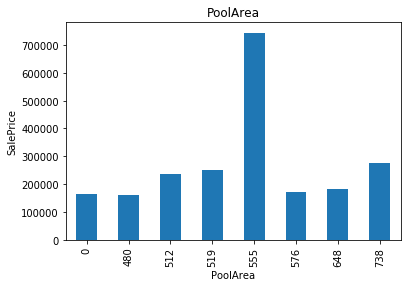

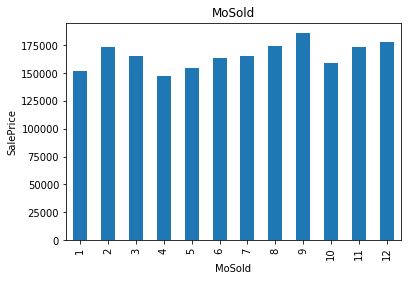

In [14]:
def analyse_discrete(df,var):
    df=df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data,var)

We can go through the individual plots and derive our own conclusions.The relationship between the variable and the SalePrice is not always monotonic.For OverallQual there is a monotonic relationship the higher the quality the higher the SalePrice.

### 6.Continous Variables

In [15]:
# List of Continous variables 
cont_vars=[var for var in num_vars if var not in discrete_vars + year_vars+['Id']]

print('Number of continous variables:',len(cont_vars))

Number of continous variables: 19


In [16]:
# Let's Visualize the continous variables

data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


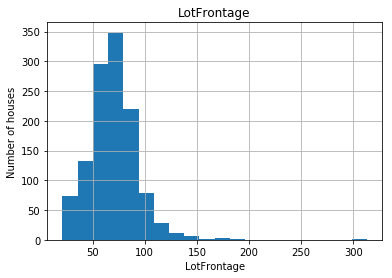

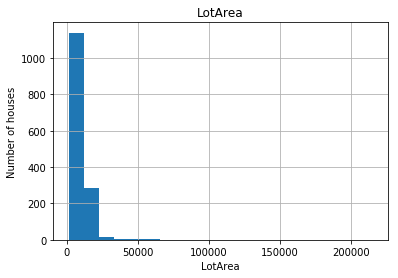

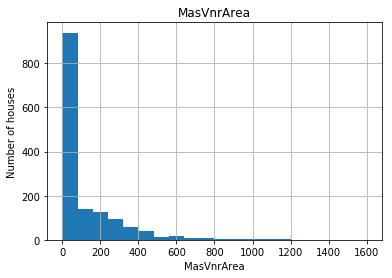

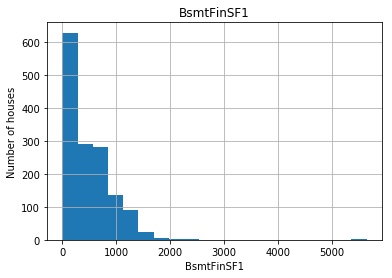

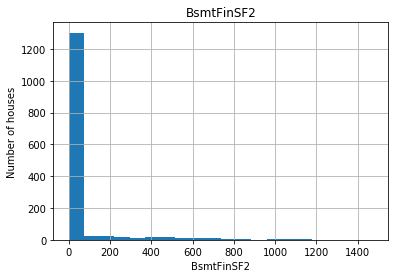

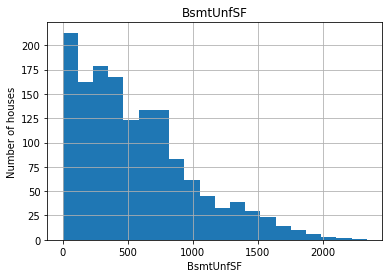

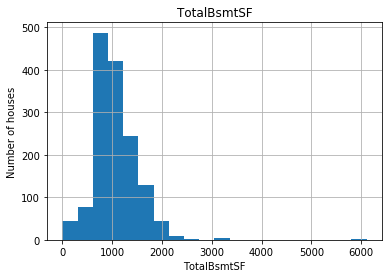

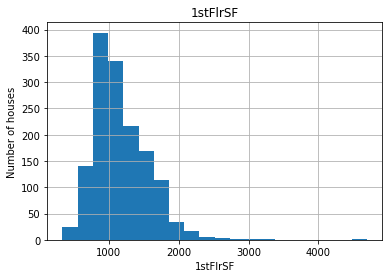

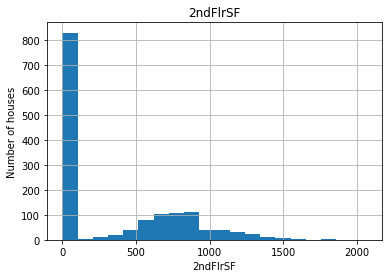

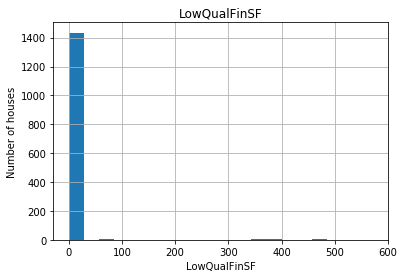

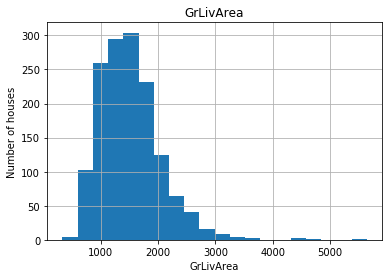

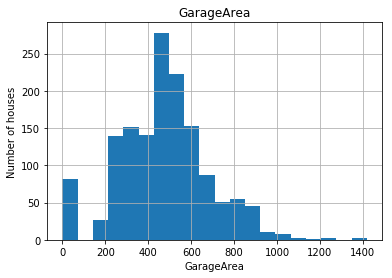

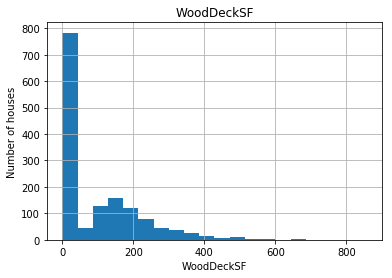

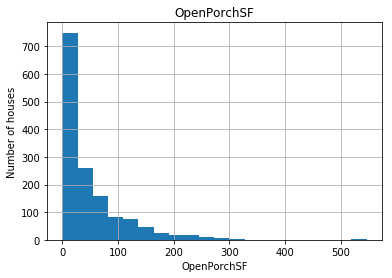

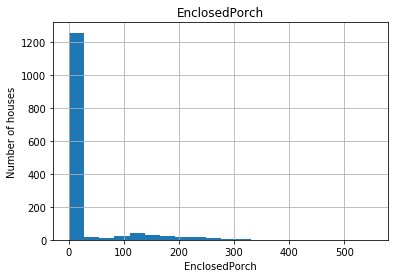

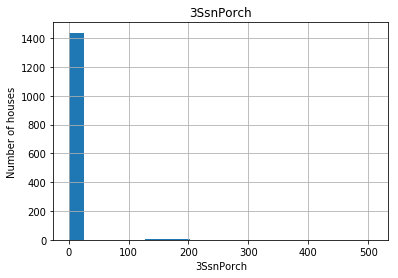

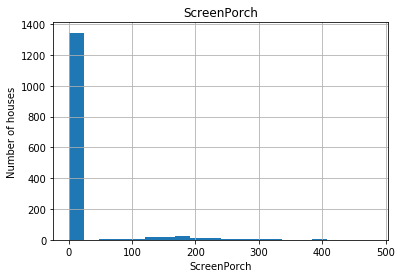

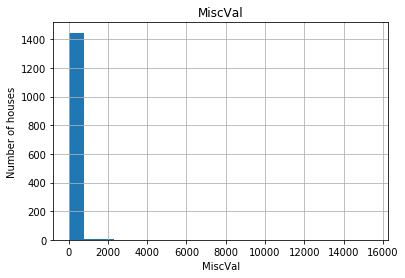

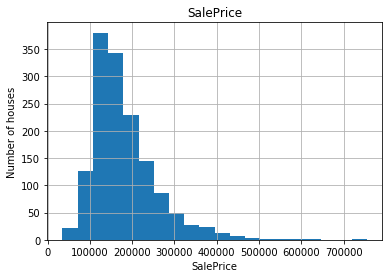

In [17]:
# Lets Go ahead and analyse the distribution of this variables
def analyse_continous(df,var):
    df=df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data,var)


We can see from the distribution of the variables that most of the distributions are scewed.For linear regression we assume that our vaiables have linear distribution.To get better prediction from our models we need to convert the variables into Normal Or Gaussian Distribution.To convert the variables into normal distribution we need to apply log function to the variables.

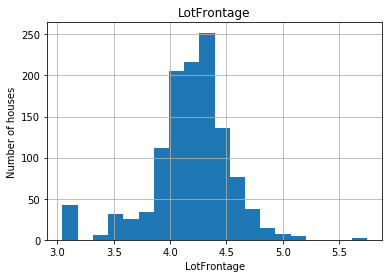

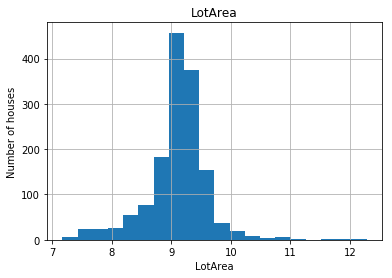

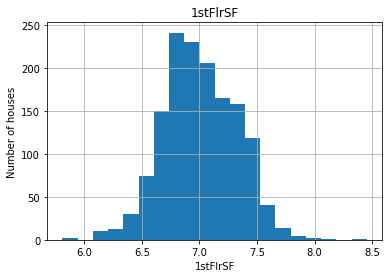

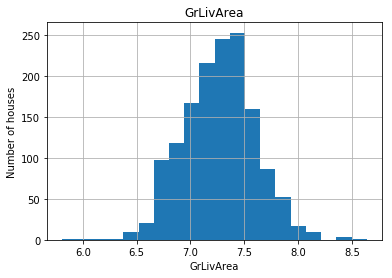

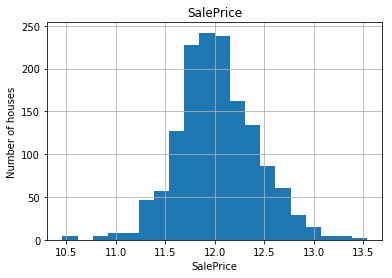

In [18]:
# Lets go ahead and analyse the distribution of this variables with log function
def analyse_transformed_continous(df,var):
    df=df.copy()
    
    # Log does not take negative value,so let's be careful and skip those variables 
    if 0 in data[var].unique():
        pass
    else:
        # Log transform the variable 
        df[var]=np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()

for var in cont_vars:
    analyse_transformed_continous(data,var)

So most of over variables have been transformed from skewed to normal Gaussian distrubution.This will help us to improve the prediction of results from our model.

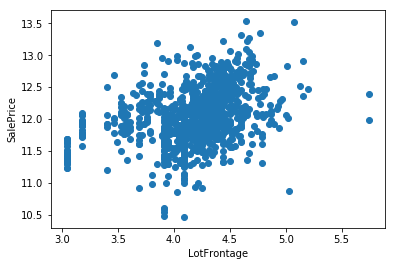

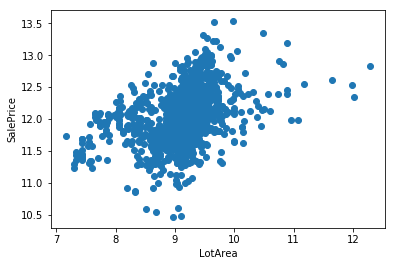

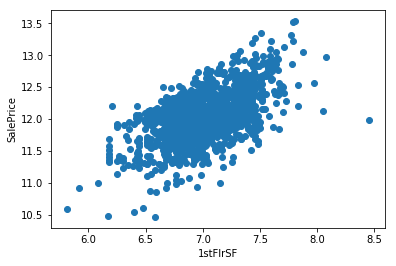

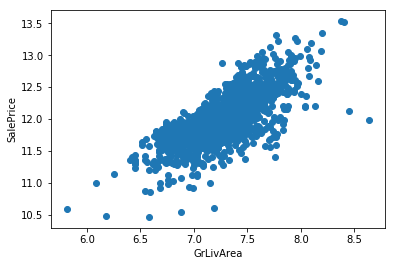

In [19]:
# Lets explore the relationship between the transformed varibales and the house Sale Price 

def transform_analyse_continous(df,var):
    df=df.copy()
    
    # Log does not take negative values, so let's be careful and skip those variables 
    if 0 in data[var].unique():
        pass
    else:
        # Log transform
        df[var]=np.log(df[var])
        df['SalePrice']=np.log(df['SalePrice'])
        plt.scatter(df[var],df['SalePrice'])
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.show()
        
for var in cont_vars:
    if var !='SalePrice':
        transform_analyse_continous(data,var)

So we can see that GrLivArea and 1stFirSF have good linear correlation with the Sale Price of the house.

### 7.Outliers

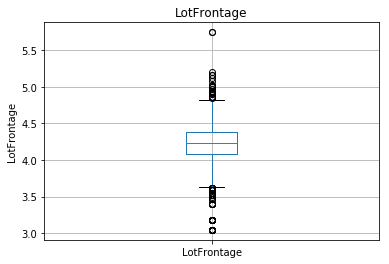

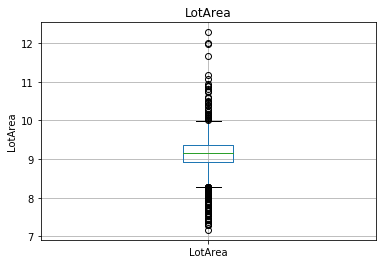

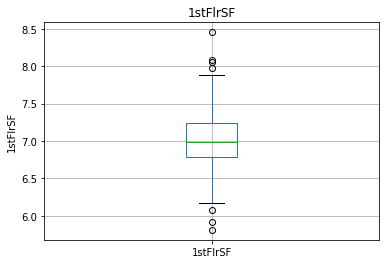

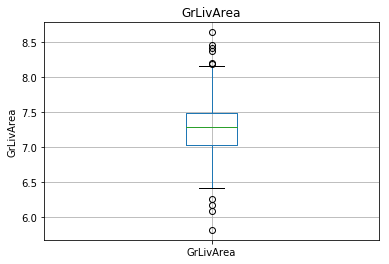

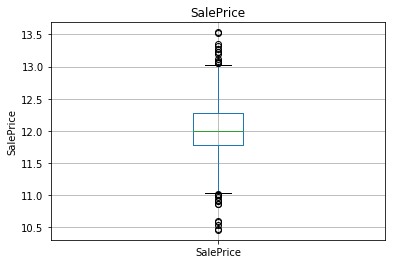

In [20]:
# Let's make boxplots to visualise outliers in the continous variables 

def find_outliers(df,var):
    df=df.copy()
    
    # Log does not take negative values,so let's be careful and skip those variables 
    if 0 in data[var].unique():
        pass
    else:
        df[var]=np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
        
for var in cont_vars:
    find_outliers(data,var)

All the variables have outliers.The perfromance of linear models is affected by outliers.Removing the outliers can improve the accuracy of the model.

### 8.Categorical variables

In [21]:
### Categorical variables 

cat_vars=[var for var in data.columns if data[var].dtype=='O']

print('Number of categorical variables:',len(cat_vars))

Number of categorical variables: 43


In [22]:
# Let's visualize the values of categorical variables 
data[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 8.1 Number of labels:cardinality

Let's evaluate the number of categories present in each variable 

In [23]:
for var in cat_vars:
    print(var,len(data[var].unique()),'categories')

MSZoning 5 categories
Street 2 categories
Alley 3 categories
LotShape 4 categories
LandContour 4 categories
Utilities 2 categories
LotConfig 5 categories
LandSlope 3 categories
Neighborhood 25 categories
Condition1 9 categories
Condition2 8 categories
BldgType 5 categories
HouseStyle 8 categories
RoofStyle 6 categories
RoofMatl 8 categories
Exterior1st 15 categories
Exterior2nd 16 categories
MasVnrType 5 categories
ExterQual 4 categories
ExterCond 5 categories
Foundation 6 categories
BsmtQual 5 categories
BsmtCond 5 categories
BsmtExposure 5 categories
BsmtFinType1 7 categories
BsmtFinType2 7 categories
Heating 6 categories
HeatingQC 5 categories
CentralAir 2 categories
Electrical 6 categories
KitchenQual 4 categories
Functional 7 categories
FireplaceQu 6 categories
GarageType 7 categories
GarageFinish 4 categories
GarageQual 6 categories
GarageCond 6 categories
PavedDrive 3 categories
PoolQC 4 categories
Fence 5 categories
MiscFeature 5 categories
SaleType 9 categories
SaleCondition 6

All the variables have less number of categories within them.So we can say they have low cardinality.If the dataset has higher cardinality then we need to do feature engineering to improve our model accuracy.

### 8.2 Rare labels

Lets find out if there labels which are present for only few houses 

In [24]:
def analyse_rare_labels(df,var,rare_perc):
    df=df.copy()
    tmp=df.groupby(var)['SalePrice'].count()/len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(data,var,0.01))

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64
Street
Grvl    0.00411
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
LotShape
IR3    0.006849
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64
LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64
LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64
Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64
Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64
Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64
RoofStyle
Flat       0.0089

There are some labels in the dataset which have less than 1% contribution.They can cause problem with the Machine learning model as they may result in the overfitting of the model.It is better to remove such labels from the datset.

## B]Feature Engineering

### 1.Setting Seed

In [25]:
# to handle the dataset
import pandas as pd
import numpy as np

# for plotting 
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling 
from sklearn.preprocessing import MinMaxScaler

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)



In [26]:
data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2.Separate Dataset into Train and Test 

Before beginning to engineer our features,it is important to separate our data into training and testing set.This is to avoid over-fitting.This step involves randomness so we need to set the seed.

In [27]:
# Let's Separate into train and test set
# Remember to se the seed (random_state for the sklearn function)

X_train,X_test,y_train,y_test=train_test_split(data,data.SalePrice,test_size=0.1,random_state=0) # Here we are setting the seed 

### 3.Missing values 

For categorical variables,we will fill the the missing information with a additional category 'missing'

In [28]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes=='O']

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(data[var].isnull().mean(),3),'% missing values')

Alley 0.938 % missing values
MasVnrType 0.005 % missing values
BsmtQual 0.025 % missing values
BsmtCond 0.025 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.025 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.473 % missing values
GarageType 0.055 % missing values
GarageFinish 0.055 % missing values
GarageQual 0.055 % missing values
GarageCond 0.055 % missing values
PoolQC 0.995 % missing values
Fence 0.808 % missing values
MiscFeature 0.963 % missing values


In [29]:
# function to replace NA in categorical variabsables 
def fill_categorical_na(df,var_list):
    X=df.copy()
    X[var_list]=df[var_list].fillna('Missing')
    return X

In [30]:
# replace missing values with new label: "Missing"
X_train=fill_categorical_na(X_train,vars_with_na)
X_test=fill_categorical_na(X_test,vars_with_na)

# check that we have no missing information in the engineered variables 
X_train[vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [31]:
# check that the test set does not contain null values in the engineered variables
[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

[]

For numerical variables,we are going to add an additional variable capturing the missing information and then replace the missing information in the original variable by the mode or most frequent value.  

In [32]:
# make a list of the numerical variables that contain missing values 
vars_with_na=[var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(X_train[var].isnull().mean(),3),'% missing values')

LotFrontage 0.177 % missing values
MasVnrArea 0.005 % missing values
GarageYrBlt 0.056 % missing values


In [33]:
# replace the missing value 
for var in vars_with_na:
    
    # calculate the mode
    mode_val= X_train[var].mode()[0]
    
    # train
    X_train[var+'_na']= np.where(X_train[var].isnull(),1,0)
    X_train[var].fillna(mode_val,inplace=True)
    
    # test
    X_test[var+'_na']= np.where(X_test[var].isnull(),1,0)
    X_test[var].fillna(mode_val,inplace=True)
    
# check that we have no more missing values in the engineering variables 
X_train[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [34]:
X_train[['LotFrontage_na','MasVnrArea_na','GarageYrBlt_na']].head()

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0


In [35]:
# check that the test set doesnt have null values in the engineered variables 
[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

[]

### 4.Temporal variables 

We have 4 variables that refer to the years in which something was built or something specific happened.We will capture the time elapsed between the variable and year thats house was sold.

In [36]:
# Let's explore the relationship between the year variables and the house price in bit more details

def elapsed_years(df,var):
    # capture difference between year variable and the year the house was sold
    df[var] = df['YrSold'] -df[var]
    return df

In [37]:
for var in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    X_train = elapsed_years(X_train,var)
    X_test = elapsed_years(X_test,var)

In [38]:
# check that test set does not contain null values in the engineered variables 
[vr for var in ['YearBuilt','YearRemodAdd','GarageYrBlt'] if X_test[var].isnull().sum()>0]

[]

### 5.Numerical variables

We will lofg transform the numerical variables that do not contain zeros in order to get a more Gausian-Like distribution.This tends to help Linear machine learning models.

In [39]:
for var in ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']:
    X_train[var]=np.log(X_train[var])
    X_test[var]=np.log(X_test[var])   

In [40]:
# check that the test set does not contain null values in the engineered variables 
[var for var in ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice'] if X_test[var].isnull().sum()>0]

[]

In [41]:
# check that the train set does not contain null values in the engineered variables 
[var for var in ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice'] if X_train[var].isnull().sum()>0]

[]

 ### 6.Categorical variables
 
 First we will remove those categories within variables that are present in less than 1% of the observations

In [42]:
# Let's capture the categorical variables first 
cat_vars = [var for var in X_train.columns if X_train[var].dtype=='O']

In [43]:
def find_frequent_labels(df,var,rare_perc):
    # finds the labels that are shared by more than a certain % of the houses in the dataset 
    df=df.copy()
    tmp=df.groupby(var)['SalePrice'].count()/len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(X_train,var,0.01)
    X_train[var] = np.where(X_train[var].isin(frequent_ls),X_train[var],'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_ls),X_test[var],'Rare')

Next we need to transform the strings of these varibales into numbers.We will do it so that we capture the monotinic relationship between the label and the target.

In [44]:
# this function will assign discrete values to the strings of the variables,
# so that the similar value corresponds to the smaller mean target 

def replace_categories(train,test,var,target):
    ordered_labels=train.groupby([var])[target].mean().sort_values().index
    ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}
    train[var]=train[var].map(ordinal_label)


In [45]:
for var in cat_vars:
    replace_categories(X_train,X_test,var,'SalePrice')

In [46]:
# check absence of na
[var for var in X_train.columns if X_train[var].isnull().sum()>0]

[]

In [47]:
# check absence of na
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

[]

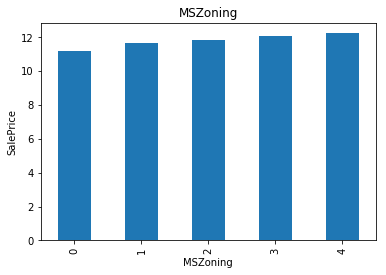

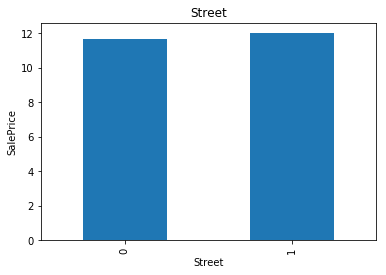

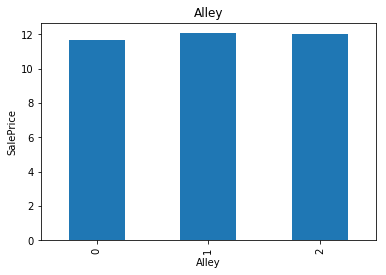

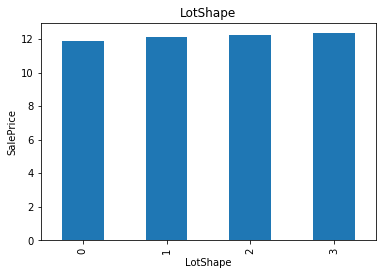

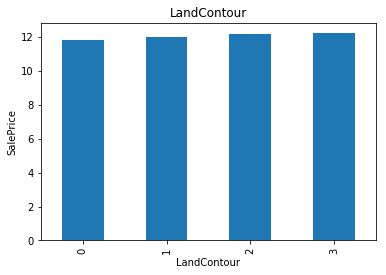

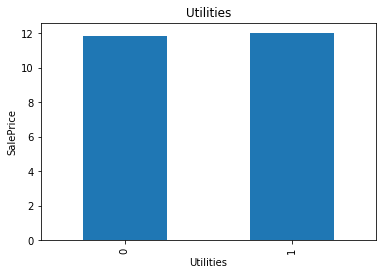

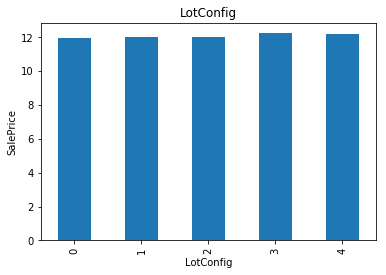

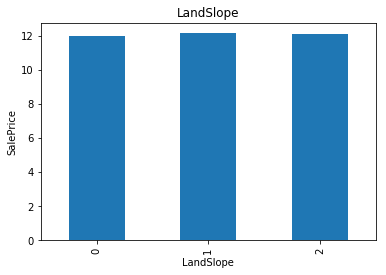

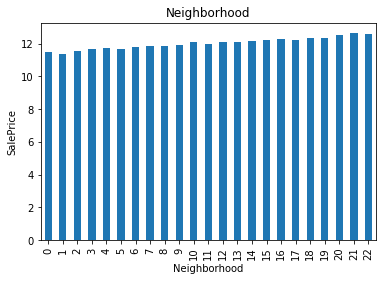

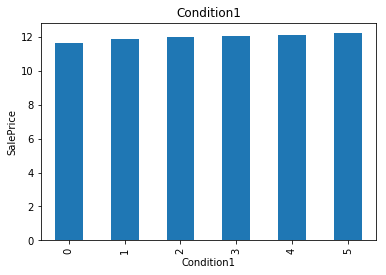

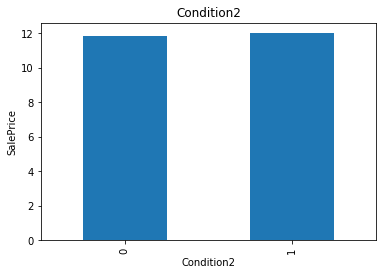

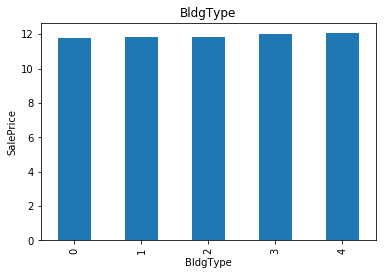

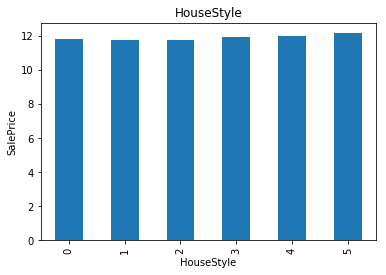

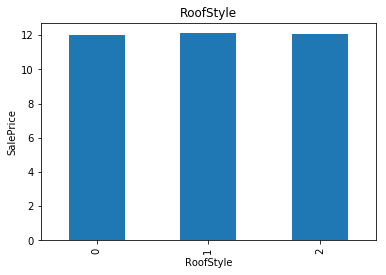

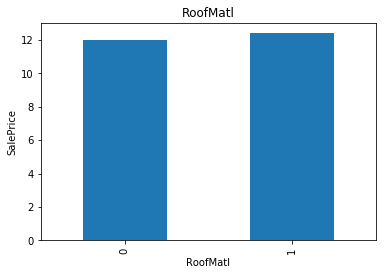

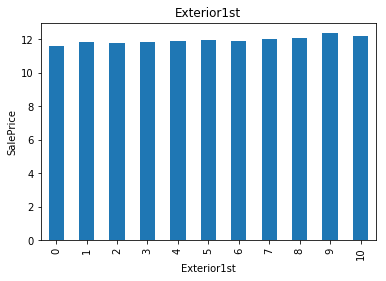

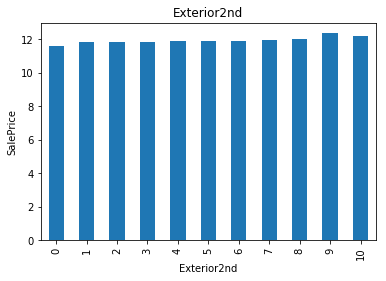

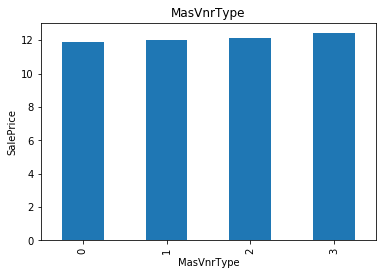

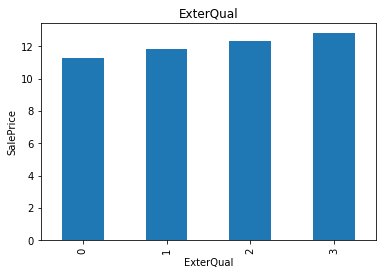

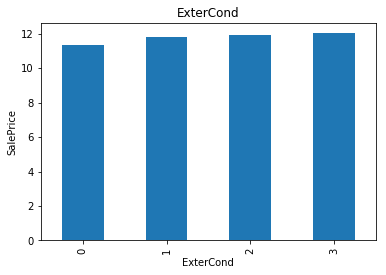

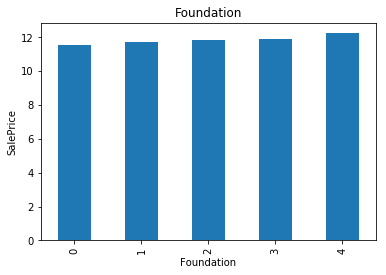

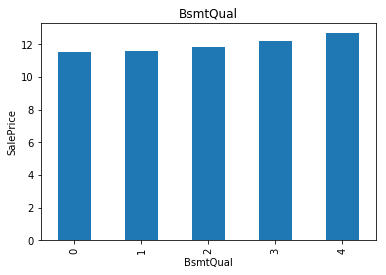

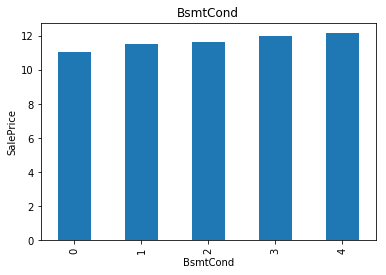

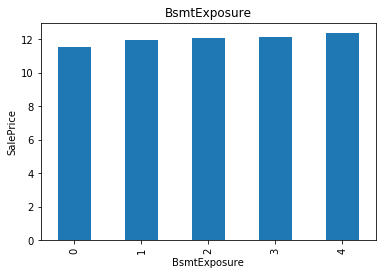

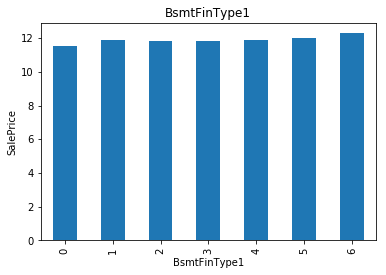

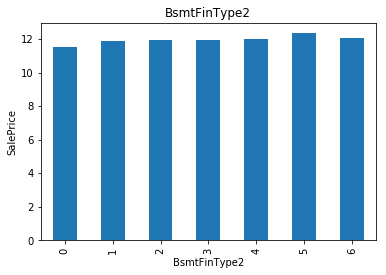

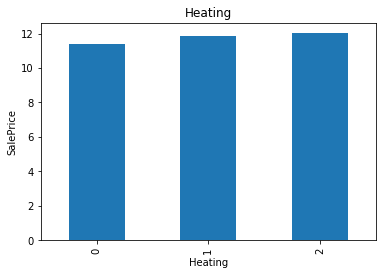

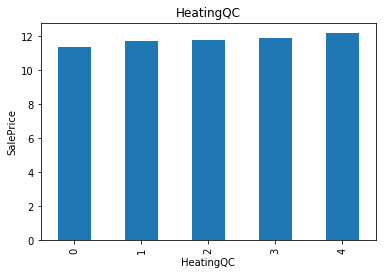

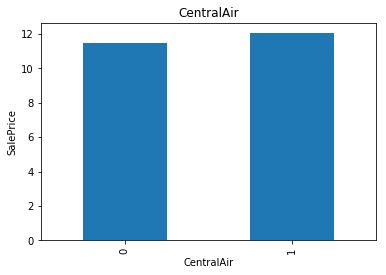

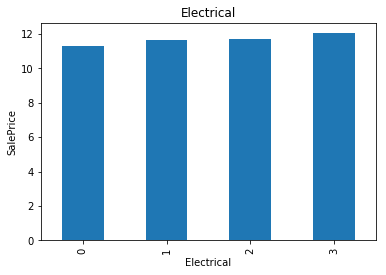

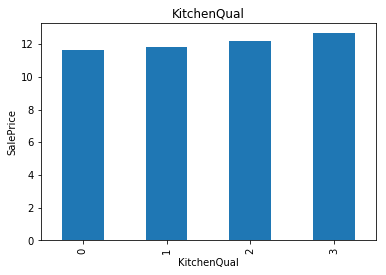

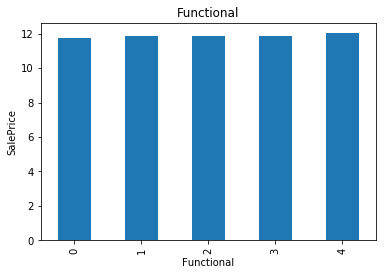

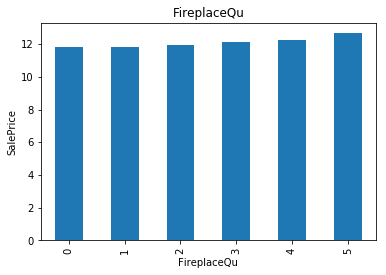

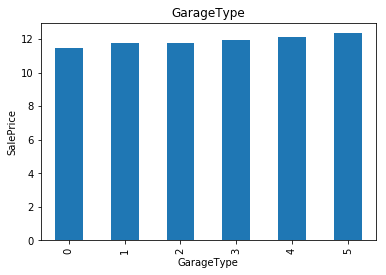

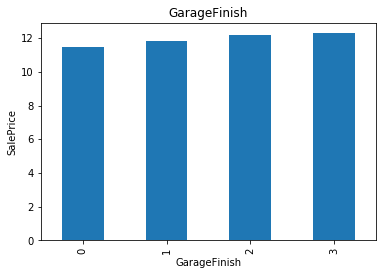

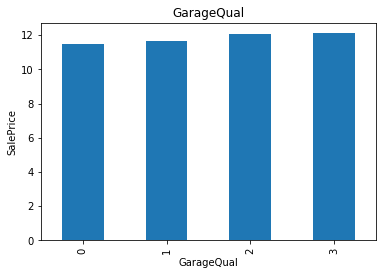

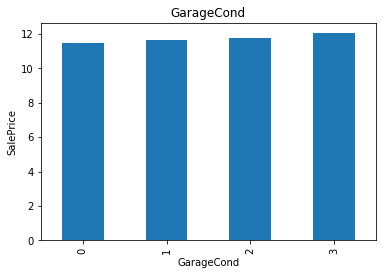

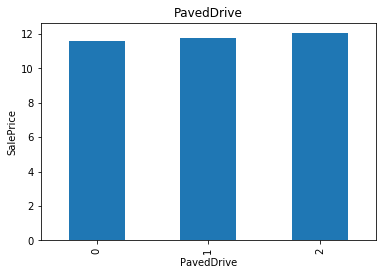

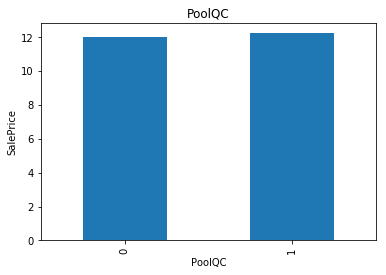

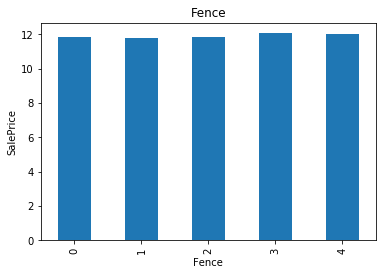

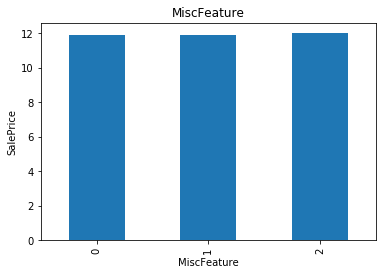

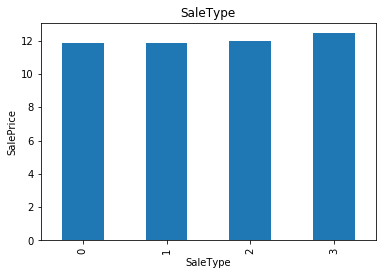

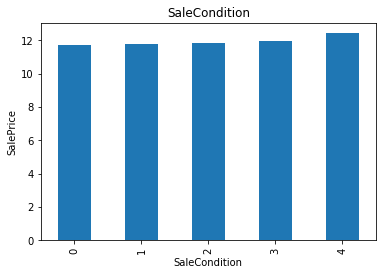

In [48]:
# Let me show you what I mean by monotonic relationship between the labels and target
def analyse_vars(df,var):
    df=df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train,var)

We can now see monotonic relationships between the labels of our variables and the target (remember that the target is log-transformed,that is why the difference seem so small)

### 7.Feature Scaling 

For use in linear models,features need to be either scaled or normalised.In the next section,I will scale features between the min and max values:

In [49]:
train_vars = [var for var in X_train.columns if var not in ['Id','SalePrice']]
len(train_vars)

82

In [50]:
X_train[['Id','SalePrice']].reset_index(drop=True)

,Id,SalePrice
0,931,12.211060
1,657,11.887931
2,46,12.675764
3,1349,12.278393
4,56,12.103486
...,...,...
1309,764,12.727838
1310,836,11.759786
1311,1217,11.626254
1312,560,12.363076


In [51]:
# Fit scaler 
scaler = MinMaxScaler() # create an instance 
scaler.fit(X_train[train_vars])  # fit the scaler to the train set for later user 

# transform the train and test set, and add on the Id and the SalePrice variables 
X_train = pd.concat([X_train[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(X_train[train_vars]),columns=train_vars)],axis=1)

X_test = pd.concat([X_test[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(X_test[train_vars]),columns=train_vars)],axis=1)

ValueError: could not convert string to float: 'RL'

In [52]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


In [53]:
# Lets now save the train and test sets for the future reference
#X_train.to_csv('xtrain.csv',index=False)
#X_test.to_csv('xtest.csv',index=False)

### C]Feature Selection 

In [54]:
# to build the models 
from sklearn.linear_model import Lasso 
from sklearn.feature_selection import SelectFromModel

In [55]:
# capture the target 
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

# drop unnecessary variables from our training and testing sets 
X_train.drop(['Id','SalePrice'],axis=1,inplace=True)
X_test.drop(['Id','SalePrice'],axis=1,inplace=True)

Let's go ahead and select a subset of the most predictive features.There is an element of randomness in the Lasso regression so rememeber to se the seed.

In [56]:
#
#
#

sel_ = SelectFromModel(Lasso(alpha=0.005,random_state=0))
sel_.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [57]:
# this command lets us visualise those feature that were kept 
# kept features are marked as True
sel_.get_support()


array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [58]:
selected_feat=X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_==0)))

total features: 82
Selected features: 22
Features with coefficients shrank to zero: 60


In [59]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

### Identify the selected variables

In [60]:
selected_feat = X_train.columns[(sel_.estimator_.coef_!=0).ravel().tolist()]
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [61]:
#pd.Series(selected_feats).to_csv('selected_features.csv',index=False)

### D]Model building 

#### Regularised Linear Regression 

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [63]:
lin_model = Lasso(alpha=0.005,random_state=0)
lin_model.fit(X_train,y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
pred=lin_model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train),np.exp(pred))))
print('linear train rmse:{}'.format(sqrt(mean_squared_error(np.exp(y_train),np.exp(pred)))))
print()
#pred=lin_model.predict(X_test)
#print('linear train mse: {}'.format(mean_squared_error(np.exp(y_test),np.exp(pred))))
#print('linear train rmse:{}'.format(sqrt(mean_squared_error(np.exp(y_test),np.exp(pred)))))
#print()
print('Average house price:',np.exp(y_train).median())

linear train mse: 1087445326.1645122
linear train rmse:32976.43592270869

Average house price: 163000.00000000012


In [65]:
# Let's evaluate our predictions wrt to original price 
#plt.scatter(y_test,lin_model.predict(X_test))
#plt.xlabel('True House Price')
#plt.ylabel('Predicted House Price')
#plt.title('Evaluation of Lasso Predictions')

In [66]:
# Let's evaluae the distrubution of the errors :
# They should be fairly normally distributed

#errors = y_test - lin_model.predict(X_test)
#errors.hist(bins=15)

In [67]:
# Feature importance 

"""importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = selected_feat
importance.sort_values(inplace=True,ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficents')
plt.title('Feature importance')"""

"importance = pd.Series(np.abs(lin_model.coef_.ravel()))\nimportance.index = selected_feat\nimportance.sort_values(inplace=True,ascending=False)\nimportance.plot.bar(figsize=(18,6))\nplt.ylabel('Lasso Coefficents')\nplt.title('Feature importance')"